<a href="https://colab.research.google.com/github/SachinPrasanth777/Machine_Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'Fungal infection'),
  Text(1, 0, 'Hepatitis C'),
  Text(2, 0, 'Hepatitis E'),
  Text(3, 0, 'Alcoholic hepatitis'),
  Text(4, 0, 'Tuberculosis'),
  Text(5, 0, 'Common Cold'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Dimorphic hemmorhoids(piles)'),
  Text(8, 0, 'Heart attack'),
  Text(9, 0, 'Varicose veins'),
  Text(10, 0, 'Hypothyroidism'),
  Text(11, 0, 'Hyperthyroidism'),
  Text(12, 0, 'Hypoglycemia'),
  Text(13, 0, 'Osteoarthristis'),
  Text(14, 0, 'Arthritis'),
  Text(15, 0, '(vertigo) Paroymsal  Positional Vertigo'),
  Text(16, 0, 'Acne'),
  Text(17, 0, 'Urinary tract infection'),
  Text(18, 0, 'Psoriasis'),
  Text(19, 0, 'Hepatitis D'),
  Text(20, 0, 'Hepatitis B'),
  Text(21, 0, 'Allergy'),
  Text(22, 0, 'hepatitis A'),
  Text(23, 0,

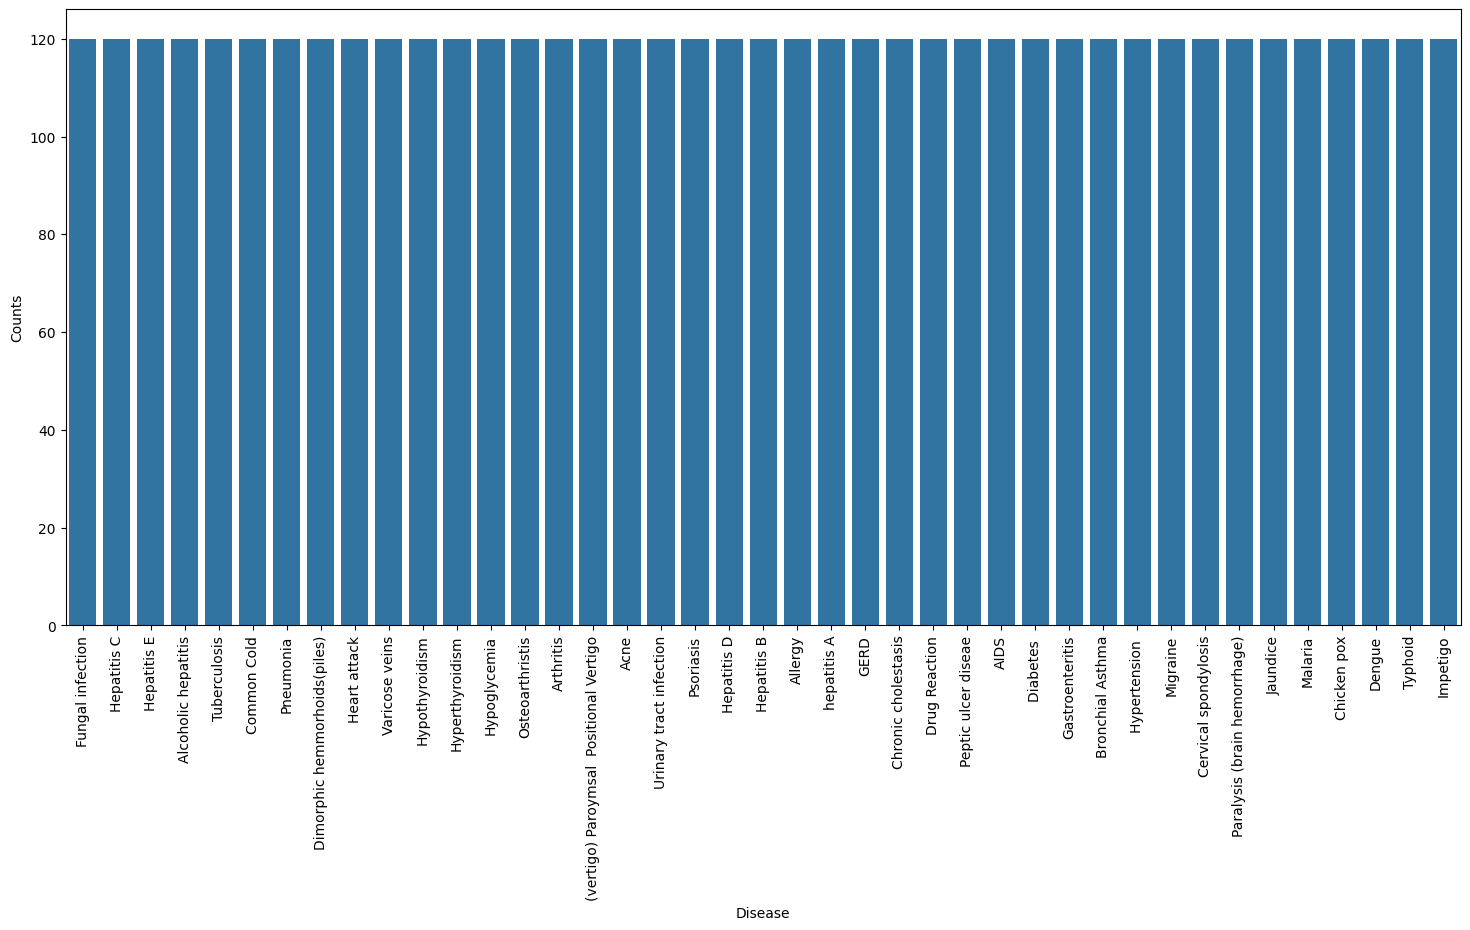

In [2]:
df=pd.read_csv('Training.csv').dropna(axis=1,how='all')
df.fillna(0,inplace=True)
df.head()
disease_counts=df["prognosis"].value_counts()
temp_df=pd.DataFrame({
    "Disease":disease_counts.index,
    "Counts":disease_counts.values
})
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)

In [3]:
encoder=LabelEncoder()
df["prognosis"]=encoder.fit_transform(df["prognosis"])
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [4]:
def cv_scoring(estimator,X,y):
  return accuracy_score(y,estimator.predict(X))
models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy by SVM Classifier on training data: 100.0
Accuracy on test data by SVM Classifier: 100.0


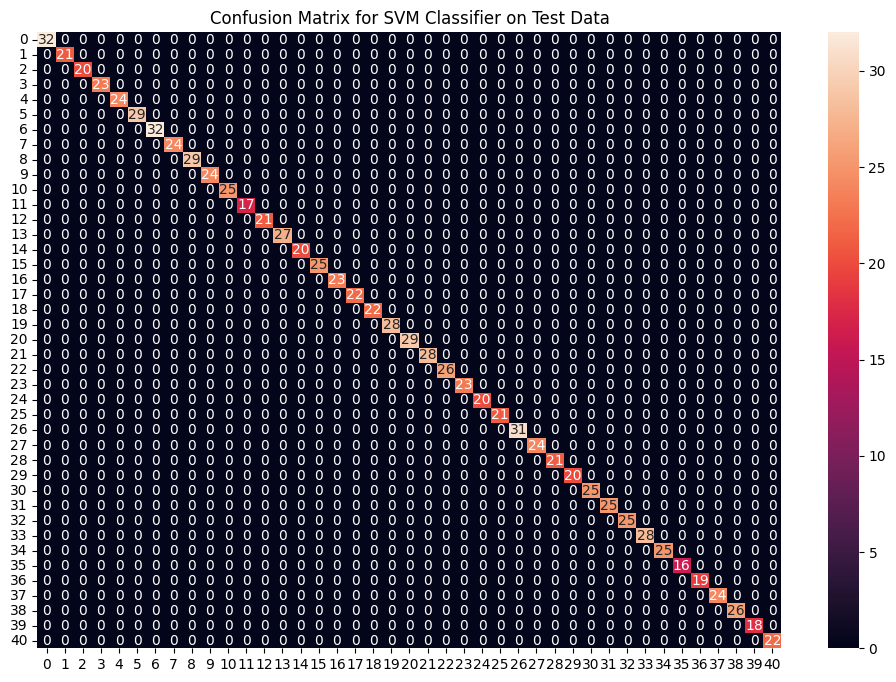

In [5]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
preds=svm_model.predict(X_test)
print(f"Accuracy by SVM Classifier on training data: {accuracy_score(y_train,svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy by Naive Bayes on training data: 100.0
Accuracy by Naive Bayes on testing data: 100.0


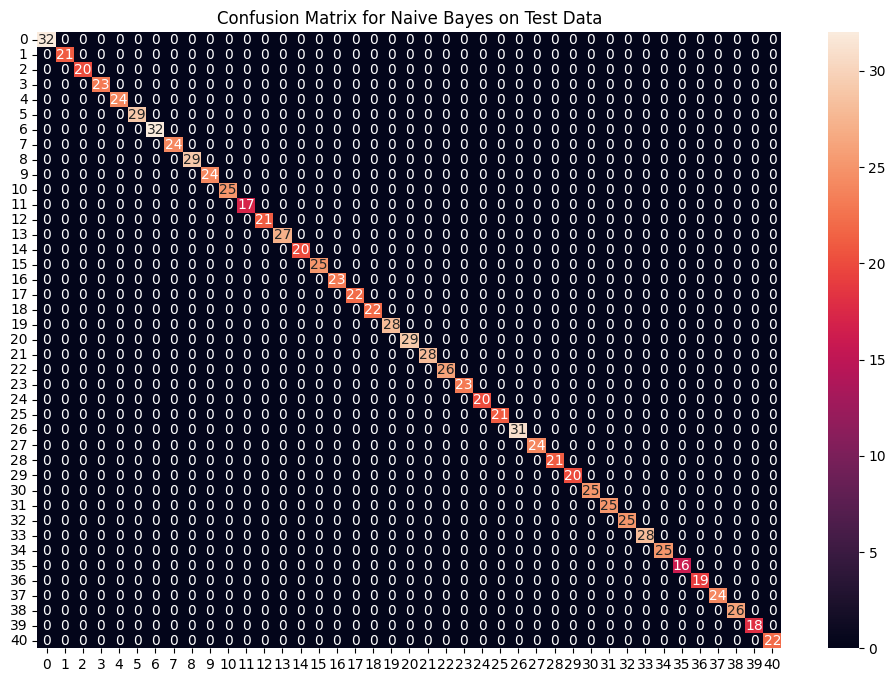

In [6]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)
preds=gaussian_nb.predict(X_test)
print(f"Accuracy by Naive Bayes on training data: {accuracy_score(y_train,gaussian_nb.predict(X_train))*100}")
print(f"Accuracy by Naive Bayes on testing data: {accuracy_score(y_test,preds)*100}")
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title('Confusion Matrix for Naive Bayes on Test Data')
plt.show()

In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
preds=rf_model.predict(X_test)
print(f"Accuracy by Random Forest Classifier on training data: {accuracy_score(y_train,rf_model.predict(X_train))*100}")
print(f"Accuracy by Random Forest Classifer on testing data: {accuracy_score(y_test,preds)*100}")
cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix by a Random Forest Classifier on Test data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


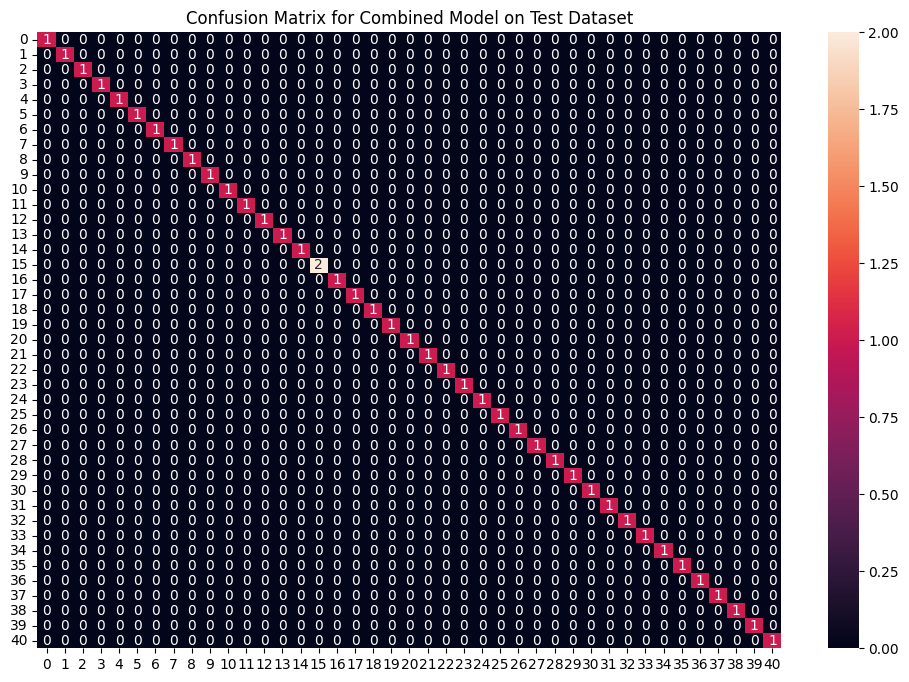

In [7]:
from statistics import mode
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
final_preds = [mode([i,j,k]) for i,j,k in zip(svm_preds, nb_preds, rf_preds)]
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [8]:
symptoms = X.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index
data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}
def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
	input_data = np.array(input_data).reshape(1,-1)
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	return predictions
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'F'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
